# Primeiro trabalho - Random Walk
Discente: Ábner Pereira

# Índice
- [Primeiro caso de teste](#Primeiro-caso-de-teste)
   - [Função objetivo](#Função-objetivo)
   - [Equação](#Equação)
   - [Faixas](#Faixas)
   - [Funções](#Funções)
   - [Execução](#Execução)
   - [Visualização](#Visualização)
- [PSO](#PSO)

# Primeiro caso de teste

Nesta atividade será desenvolvido um Random Walk para achar o mínimo da [função objetivo](#Função-objetivo) abaixo . Usando uma distribuição uniforme para gerar uma população de sequências (x1, x2, e x3) de números reais variando de 0 a 1, convertidos respectivamente segundo as [faixas](#Faixas) de x1, x2 e x3, sob a [Equação](#Equação) abaixo.

### Função objetivo

In [184]:
from IPython.display import display, Math, Latex
display(Math(r'Fun = 10 \times (x_1 - 1)^{2} + 20 \times (x_2 - 2)^{2} + 30 \times (x_3 - 3)^{2}'))

<IPython.core.display.Math object>

### Equação

In [185]:
display(Math(r"x_i'= LB_{x_i} + (UB{x_i} - LB{x_i}) \times valor_i"))

<IPython.core.display.Math object>

### Faixas

In [186]:
display(Math(r'LB_{x_1} = -3, UB_{x_1} = 3'))
display(Math(r'LB_{x_2} = -2, UB_{x_2} = 4'))
display(Math(r'LB_{x_3} = 0, UB_{x_3} = 6'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [187]:
#Entrada
x_inf = 0
x_sup = 1
qtd_seqs = 100
qtd_valores = 3
qtd_geracoes = 200
qtd_execucoes = 20
lb = [-3,-2, 0]  
ub = [3, 4, 6]

### Funções

In [188]:
def populacao_a(x_inf, x_sup, qtd_seqs, qtd_valores):
  #valores a aleatórios
  populacao = [[]]
  populacao = np.random.uniform(x_inf,x_sup,(qtd_seqs,qtd_valores))
  return populacao

In [189]:
def populacao_n(lb, ub, qtd_seqs, qtd_valores, populacao):
  #conversão nas faixas
  i = 0
  for i in range(qtd_seqs):
    j = 0
    for j in range(qtd_valores):
      # equação 1 em cada valor
      populacao[i][j] = lb[j] + (ub[j] - lb[j]) * populacao[i][j]
      j += 1
    i += 1
  return populacao

In [190]:
def funcao_obj(x1, x2, x3):
  y = 0
  y = 10 * (x1 - 1)**2 + 20 * (x2 - 2)**2 + 30 * (x3 - 3)**2
  return y

In [191]:
def resultado(qtd_seqs, qtd_valores, populacao):
  i = 0
  x = [0,0,0]
  y = []
  for i in range(qtd_seqs):
    j = 0
    for j in range(qtd_valores):
      x[j] = populacao[i][j]
      j += 1
    y.append(funcao_obj(x[0], x[1], x[2]))
    i += 1
  return y

### Execução

In [192]:
import numpy as np
import pandas as pd

In [193]:
df_populacao = pd.DataFrame(None, columns=["x1", "x2", "x3", "y"]) #melhores indivíduos por geração
df_fitness =  pd.DataFrame(None, columns=["x1", "x2", "x3", "y"]) #melhor fitness por geração
df_solucoes = pd.DataFrame(None, columns=["x1", "x2", "x3", "y"]) #melhores resultados por execução do algoritmo
df_dispersao =  pd.DataFrame(None, columns=["mean", "std"]) #valores por  execução do algoritmo

for i in range(qtd_execucoes):
  for j in range(qtd_geracoes):
    #Criando população com indivíduos aleatórios com valores entre X_INF e X_SUP convertendo-os às faixas
    if j == 0:
      populacao_final = []
      populacao_final = populacao_n(lb, ub, qtd_seqs, qtd_valores, populacao_a(x_inf, x_sup, qtd_seqs, qtd_valores))
    else:
      populacao_final = []
      populacao_final = populacao_n(lb, ub, meio, qtd_valores, populacao_a(x_inf, x_sup, meio, qtd_valores))

    #Gerando resultado para cada indivíduo
    if j == 0:
      valores_r = []
      valores_r = resultado(qtd_seqs, qtd_valores, populacao_final)
    else:
      valores_r = []
      valores_r = resultado(meio, qtd_valores, populacao_final)
    
    #Guardando novos resultados no Data Frame
    df_pf = pd.DataFrame(populacao_final, columns=["x1", "x2", "x3"])
    df_pf["y"] = valores_r
    df_populacao = pd.concat([df_populacao, df_pf])
    
    #Ordenando indivíduos/resultados
    df_populacao.sort_values(by=["y"], inplace=True)
    df_populacao.reset_index(drop=True, inplace=True)
    
    #Guardando melhor fitness da geração
    df_fitness = df_fitness.append(df_populacao.iloc[[0]], ignore_index=True)

    #Excluindo 50% piores indivíduos
    meio = int(len(df_populacao)/2)
    df_populacao.drop(df_populacao[df_populacao.index >= meio].index, inplace=True)
    df_populacao.reset_index(drop=True, inplace=True)

    j += 1
    
  #Guardando melhor resultado de cada execução
  df_solucoes = df_solucoes.append(df_populacao.iloc[[0]], ignore_index=True)

  #Calculando a média e desvio padrão entre os melhores fitness da execução
  df_dispersao = df_dispersao.append(df_populacao["y"].describe().loc[["mean", "std"]], ignore_index=True)

  i+=1

### Visualização

**Melhores resultados por geração**

In [194]:
df_fitness

,x1,x2,x3,y
0,2.078324,1.729019,2.405204,23.709905
1,0.871415,2.016643,2.621028,4.479481
2,0.871415,2.016643,2.621028,4.479481
3,0.871415,2.016643,2.621028,4.479481
4,0.871415,2.016643,2.621028,4.479481
...,...,...,...,...
3995,0.929583,2.029492,2.989515,0.070280
3996,0.929583,2.029492,2.989515,0.070280
3997,0.929583,2.029492,2.989515,0.070280
3998,0.929583,2.029492,2.989515,0.070280


**Melhores resultados por execução**

In [195]:
df_solucoes

,x1,x2,x3,y
0,0.898834,2.010797,3.069318,0.248827
1,0.898834,2.010797,3.069318,0.248827
2,0.898834,2.010797,3.069318,0.248827
3,0.945848,2.085274,2.973086,0.196486
4,0.945848,2.085274,2.973086,0.196486
5,0.945848,2.085274,2.973086,0.196486
6,0.945848,2.085274,2.973086,0.196486
7,0.945848,2.085274,2.973086,0.196486
8,0.945848,2.085274,2.973086,0.196486
9,0.945848,2.085274,2.973086,0.196486


**Média e desvio padrão dos fitness por execução**

In [196]:
df_dispersao

,mean,std
0,4.326967,2.059019
1,3.340005,1.593571
2,2.681486,1.309321
3,2.063265,0.956390
4,1.773627,0.772473
5,1.554730,0.700623
6,1.301917,0.608167
7,1.179414,0.575370
8,1.014339,0.493522
9,0.975959,0.476585


In [197]:
import matplotlib.pyplot as plt
import seaborn as sbn

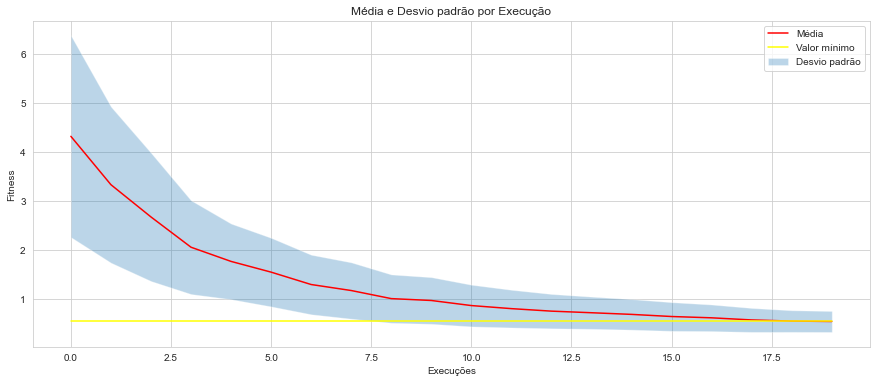

In [198]:
sbn.set_style("whitegrid")
plt.figure(figsize=(15,6))
plt.plot(df_dispersao.index, df_dispersao["mean"], label='Média', color="red")
plt.fill_between(range(len(df_dispersao)), df_dispersao["mean"]-df_dispersao["std"], df_dispersao["mean"]+df_dispersao["std"], alpha=0.3, label='Desvio padrão')
plt.plot(df_dispersao.index, [min(df_dispersao["mean"]) for i in range(len(df_dispersao.index))], label="Valor mínimo", color="yellow")
plt.xlabel('Execuções')
plt.ylabel('Fitness')
plt.title("Média e Desvio padrão por Execução")
plt.legend()
plt.show()

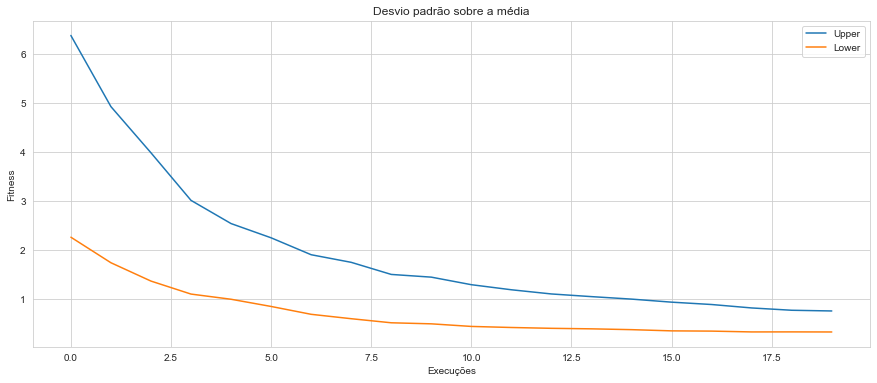

In [199]:
sbn.set_style("whitegrid")
plt.figure(figsize=(15,6))
plt.plot(df_dispersao.index, df_dispersao["mean"] + df_dispersao["std"], label='Upper')
plt.plot(df_dispersao.index, df_dispersao["mean"] - df_dispersao["std"], label='Lower')
plt.xlabel('Execuções')
plt.ylabel('Fitness')
plt.title("Desvio padrão sobre a média")
plt.legend()
plt.show()

> <p align="justify">Através dos resultados apresentados podemos observar que a população está convergindo à solução ótima (se pensarmos em minimização) neste algoritmo quando vemos que a média continua se aproximando de zero.<br>
Podemos ainda visualizar através do gráficos acima que o desvio padrão (máximo e mínimo) calculado sobre os melhores resultados selecionados um entre todas as populações por execução se aproxima cada vez mais da curva que representa a média sobre os mesmos resultados selecionados, porém ainda apresenta um valor elevado em comparação à média, nos deixando com uma baixa confiabilidade no algoritmo.</p>


# PSO

In [200]:
import numpy as np
import pandas as pd
import random
import operator
import copy

### Classe Partícula

In [201]:
class Particula:
    def __init__(self, qtd_valores, qtd_geracoes, lb, ub, w_min, w_max, c1, c2, pBest, gBest, range_values):
        self.qtd_valores = qtd_valores
        self.qtd_geracoes = qtd_geracoes
        self.lb = lb
        self.ub = ub
        self.c1 = c1
        self.c2 = c2
        self.w_min = w_min
        self.w_max = w_max
        self.pBest = pBest
        self.gBest = gBest
        self.range_values = range_values
        self.posicoes = []
        self.velocidades = [0, 0, 0]
        self.fitness = 0
        self.particula = [0, 0, 0, 0]
        self.velocidade_max = (self.range_values[1] - self.range_values[0]) / 2.0

        self.iniciar_posicoes()
        self.atualizar_velocidade_inicial()
        self.atualizar_posicoes()
        self.calcular_fitness()

    def iniciar_posicoes(self):
        for i in range(self.qtd_valores):
            self.posicoes.append(self.lb[i] + (self.ub[i] - self.lb[i]) * random.uniform(0,1))

    def atualizar_velocidade_inicial(self):
        for i in range(self.qtd_valores):
            self.velocidades[i] = self.posicoes[i] * random.uniform(0,1)
        
    def atualizar_velocidades(self, pBest, gBest, t):
        for i in range(self.qtd_valores):
            r1 = random.uniform(0,1)
            r2 = random.uniform(0,1)
            w = self.w_max - (self.w_max - self.w_min) * t / self.qtd_geracoes
            self.velocidades[i] = w*self.velocidades[i] + self.c1*r1*(pBest[i] - \
                self.posicoes[i]) + self.c2*r2*(gBest[i] - self.posicoes[i])

            if abs(self.velocidades[i]) > self.velocidade_max:
                self.velocidades[i] = np.sign(self.velocidades[i]) * self.velocidade_max
            
            if self.posicoes[i] < self.range_values[0]:
                self.posicoes[i] = self.range_values[0]
            if self.posicoes[i] > self.range_values[1]:
                self.posicoes[i] = self.range_values[1]

    def atualizar_posicoes(self):
        for i in range(self.qtd_valores):
            self.posicoes[i] = self.posicoes[i] + self.velocidades[i]
            

    def calcular_fitness(self):
        self.fitness = 10 * (self.posicoes[0] - 1)**2 + 20 * (self.posicoes[1] - 2)**2 + 30 * (self.posicoes[2] - 3)**2

    '''def atualizar_particula(self):
        for i  in range(self.qtd_valores):
                self.particula[i] = self.posicoes[i]
        self.particula[3] = self.fitness'''



In [202]:
class Enxame:
    def __init__(self, qtd_seqs, qtd_valores, qtd_geracoes, lb, ub, w_min, w_max, c1, c2, pBest, gBest, range_values):
        self.qtd_seqs = qtd_seqs
        self.qtd_valores = qtd_valores
        self.qtd_geracoes = qtd_geracoes
        self.lb = lb
        self.ub = ub
        self.w_min = w_min
        self.w_max = w_max
        self.c1 = c1
        self.c2 = c2
        self.pBest = pBest
        self.gBest = gBest
        self.range_values = range_values
        self.enxame = []
        #self.enxame = pd.DataFrame(columns=["x1", "x2", "x3", "Fitness"])

        self.iniciar_enxame()
        '''for particula in self.enxame:
            print("posicoes", particula.posicoes)'''

    def iniciar_enxame(self):
        for i in range(self.qtd_seqs):
            p = Particula(self.qtd_valores, self.qtd_geracoes, self.lb, self.ub, self.w_min, self.w_max, self.c1, self.c2, self.pBest, self.gBest, self.range_values)
            p.atualizar_velocidade_inicial()
            p.atualizar_posicoes()
            p.calcular_fitness()
            self.enxame.append(p)
            #df = pd.DataFrame([self.p.particula], columns=["x1", "x2", "x3", "Fitness"])
            #self.enxame = self.enxame.append(df, ignore_index=True)
  
        '''for i in range(self.qtd_seqs-1):
            self.p.atualizar_velocidade_inicial()
            self.p.atualizar_posicoes()
            self.p.calcular_fitness()
            self.p.atualizar_particula()
            df = pd.DataFrame([self.p.particula], columns=["x1", "x2", "x3", "Fitness"])
            self.enxame = self.enxame.append(df, ignore_index=True)'''

    def atualizar_enxame(self, pBest, gBest, t):
        for i in range(self.qtd_seqs):
            self.enxame[i].atualizar_velocidades(pBest[0].posicoes, gBest.posicoes, t)
            self.enxame[i].atualizar_posicoes()
            self.enxame[i].calcular_fitness()
            
       


In [203]:
 class Geracao:
    def __init__(self, qtd_seqs, qtd_valores, qtd_geracoes, lb, ub, w_min, w_max, c1, c2, range_values):
        self.qtd_seqs = qtd_seqs
        self.qtd_valores = qtd_valores
        self.qtd_geracoes = qtd_geracoes
        self.lb = lb
        self.ub = ub
        self.w_min = w_min
        self.w_max = w_max
        self.c1 = c1
        self.c2 = c2
        self.range_values = range_values
        self.gBest = self
        self.pBest = []
        self.melhores = []
        
        self.e = Enxame(self.qtd_seqs, self.qtd_valores, self.qtd_geracoes,self.lb, self.ub, self.w_min, self.w_max, self.c1, self.c2, self.pBest, self.gBest, self.range_values)
        
        self.executar_geracoes()
        
    def executar_geracoes(self):
        gBest = min(self.e.enxame, key=operator.attrgetter('fitness'))
        self.gBest = copy.deepcopy(gBest)

        pBest = self.e.enxame
        self.pBest = copy.deepcopy(pBest)

        for t in range(self.qtd_geracoes):
            self.e.atualizar_enxame(self.pBest, self.gBest, t)

            for i in range(self.qtd_seqs):
                if (self.e.enxame[i].fitness < self.pBest[i].fitness):
                    self.pBest[i].posicoes = copy.deepcopy(self.e.enxame[i].posicoes)
                    self.pBest[i].fitness = copy.deepcopy(self.e.enxame[i].fitness)

                if (self.e.enxame[i].fitness < self.gBest.fitness):
                    self.gBest.posicoes = copy.deepcopy(self.e.enxame[i].posicoes)
                    self.gBest.fitness = copy.deepcopy(self.e.enxame[i].fitness)
            
            #melhores = min(self.e.enxame, key=operator.attrgetter('fitness'))
            self.melhores.append(copy.deepcopy(self.gBest))

            #print(self.gBest.fitness)

        #self.df_melhores_g = pd.concat([self.df_melhores_g, self.e.enxame[self.e.enxame['Fitness']==self.e.enxame['Fitness'].min()]])   

### Execução

In [204]:
w_max = 0.9
w_min = 0.4
c1 = c2 = 2
range_values = (-6, 6)
df_solucoes_e = pd.DataFrame(columns=["x1", "x2", "x3", "Fitness"])
df_dispersao_e = pd.DataFrame(columns=["mean", "std"])
df_p = pd.DataFrame(columns=["x1", "x2", "x3"])
df_m = pd.DataFrame(columns=["mean"])
melhores = []

for i in range(qtd_execucoes):
    g = Geracao(qtd_seqs, qtd_valores, qtd_geracoes, lb, ub, w_min, w_max, c1, c2, range_values)
    #print(g.e.enxame[qtd_seqs-1])
    
    print("Geração ", i)
    for j in range(qtd_seqs):
        print(g.melhores[j].fitness)
        melhores.append(g.melhores[j].fitness)
        
    df_mean = np.mean(melhores)
    df_m = pd.DataFrame([df_mean], columns=["mean"])
    df_std = np.std(melhores)
    df_m["std"] = df_std
    df_dispersao_e = pd.concat([df_dispersao_e, df_m], ignore_index=True)


Geração  0
45.72980382835515
45.72980382835515
15.77643236470015
15.77643236470015
8.037544034050464
8.037544034050464
8.037544034050464
8.037544034050464
8.037544034050464
8.037544034050464
8.037544034050464
7.998108078330663
7.998108078330663
3.0419284862477345
3.0419284862477345
3.0419284862477345
3.0419284862477345
3.0419284862477345
3.0419284862477345
3.0419284862477345
3.0419284862477345
3.0419284862477345
3.0419284862477345
3.0419284862477345
3.0419284862477345
3.0419284862477345
3.0419284862477345
2.5087550704479753
2.5087550704479753
2.5087550704479753
2.5087550704479753
2.2495411653771167
2.2495411653771167
2.2495411653771167
1.672464315260778
1.672464315260778
1.672464315260778
1.672464315260778
1.672464315260778
1.672464315260778
1.672464315260778
1.672464315260778
1.672464315260778
1.672464315260778
1.672464315260778
1.2021903574847843
1.2021903574847843
1.2021903574847843
1.2021903574847843
1.2021903574847843
1.2021903574847843
1.2021903574847843
0.5561049801655867
0.5561

### Visualização

**Melhores resultados por geração**

In [205]:
#df_solucoes_e

**Melhores resultados por execução**

**Média e desvio padrão dos fitness por execução**

In [206]:
df_dispersao_e

,mean,std
0,2.878633,6.814818
1,2.951348,6.881086
2,2.449971,7.317231
3,1.882655,6.412651
4,1.813849,6.119662
5,1.758177,5.744607
6,1.752632,5.484285
7,1.696643,5.271952
8,1.617817,5.039201
9,1.633255,4.926917


In [207]:
import matplotlib.pyplot as plt
import seaborn as sbn

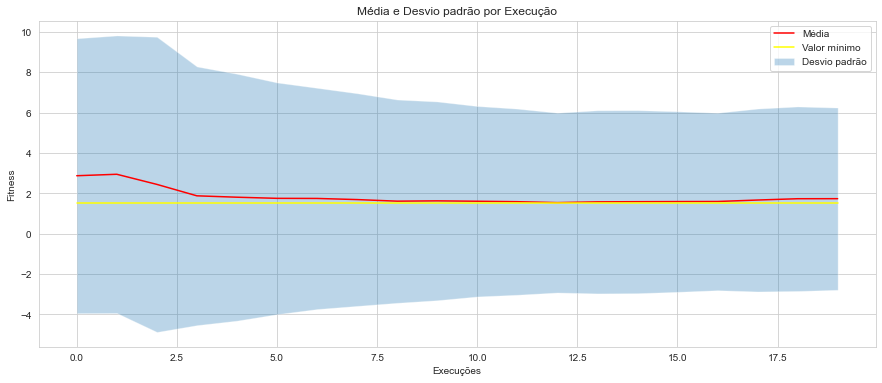

In [208]:
sbn.set_style("whitegrid")
plt.figure(figsize=(15,6))
plt.plot(df_dispersao_e.index, df_dispersao_e["mean"], label='Média', color="red")
plt.fill_between(range(len(df_dispersao_e)), df_dispersao_e["mean"]-df_dispersao_e["std"], df_dispersao_e["mean"]+df_dispersao_e["std"], alpha=0.3, label='Desvio padrão')
plt.plot(df_dispersao_e.index, [min(df_dispersao_e["mean"]) for i in range(len(df_dispersao_e.index))], label="Valor mínimo", color="yellow")
plt.xlabel('Execuções')
plt.ylabel('Fitness')
plt.title("Média e Desvio padrão por Execução")
plt.legend()
plt.show()

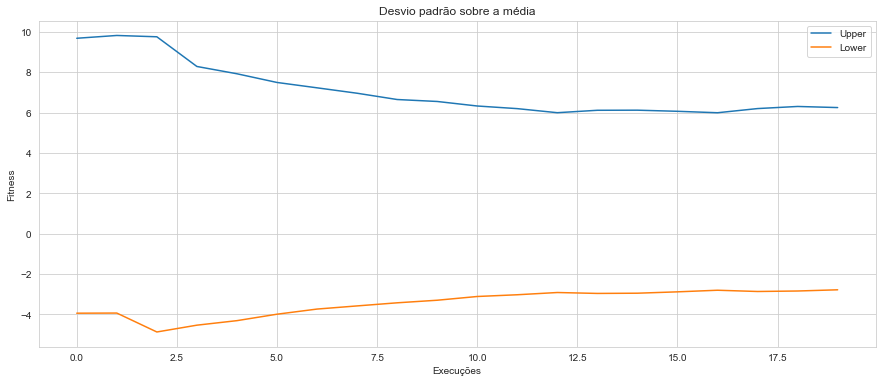

In [209]:
sbn.set_style("whitegrid")
plt.figure(figsize=(15,6))
plt.plot(df_dispersao_e.index, df_dispersao_e["mean"] + df_dispersao_e["std"], label='Upper')
plt.plot(df_dispersao_e.index, df_dispersao_e["mean"] - df_dispersao_e["std"], label='Lower')
plt.xlabel('Execuções')
plt.ylabel('Fitness')
plt.title("Desvio padrão sobre a média")
plt.legend()
plt.show()

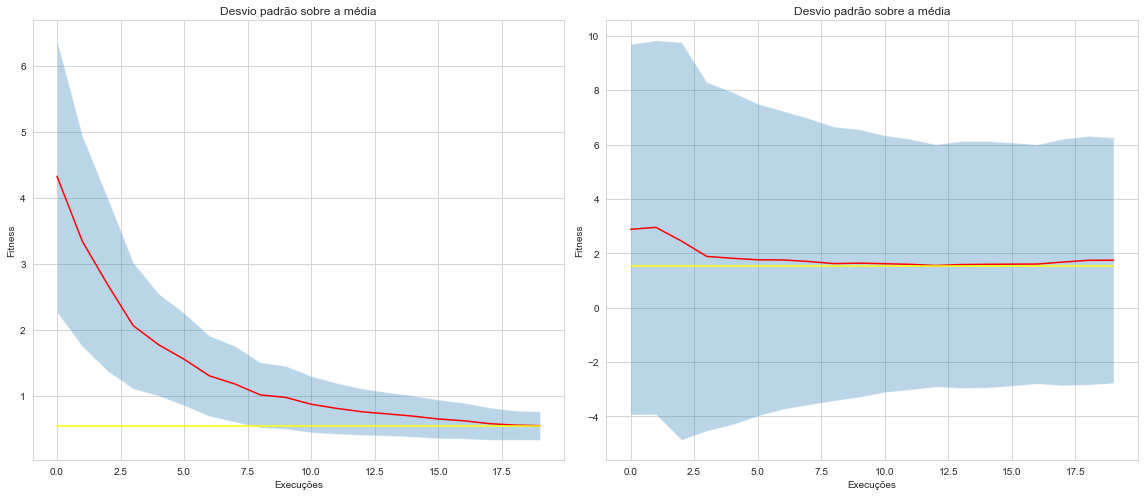

In [210]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 7))
axes[0].plot(df_dispersao.index, df_dispersao["mean"], label='Média', color="red")
axes[0].fill_between(range(len(df_dispersao)), df_dispersao["mean"]-df_dispersao["std"], df_dispersao["mean"]+df_dispersao["std"], alpha=0.3, label='Desvio padrão')
axes[0].plot(df_dispersao.index, [min(df_dispersao["mean"]) for i in range(len(df_dispersao.index))], label="Valor mínimo", color="yellow")
axes[0].set_xlabel('Execuções')
axes[0].set_ylabel('Fitness')
axes[0].set_title("Desvio padrão sobre a média")
axes[1].plot(df_dispersao_e.index, df_dispersao_e["mean"], label='Média', color="red")
axes[1].fill_between(range(len(df_dispersao_e)), df_dispersao_e["mean"]-df_dispersao_e["std"], df_dispersao_e["mean"]+df_dispersao_e["std"], alpha=0.3, label='Desvio padrão')
axes[1].plot(df_dispersao_e.index, [min(df_dispersao_e["mean"]) for i in range(len(df_dispersao_e.index))], label="Valor mínimo", color="yellow")
axes[1].set_xlabel('Execuções')
axes[1].set_ylabel('Fitness')
axes[1].set_title("Desvio padrão sobre a média")
fig.tight_layout()

> <p align="justify">Através dos resultados apresentados podemos observar que a população está convergindo à solução ótima (se pensarmos em minimização) neste algoritmo quando vemos que a média continua se aproximando de zero.<br>
Podemos ainda visualizar através do gráficos acima que o desvio padrão (máximo e mínimo) calculado sobre os melhores resultados selecionados um entre todas as populações por execução se aproxima cada vez mais da curva que representa a média sobre os mesmos resultados selecionados, porém ainda apresenta um valor elevado em comparação à média, nos deixando com uma baixa confiabilidade no algoritmo.</p>
